In [1]:
import theano
from theano import tensor as T
from theano import pp
from theano import shared
from theano.tensor.shared_randomstreams import RandomStreams

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

rng = np.random

<h3>Theano Basics</h3>
<p>Creating variables - Adding two scalar values</p>

In [2]:
# Creates an instance of TensorVariable class, that is of theano type 'dscalar'
x = T.dscalar('x')
y = T.dscalar('y')
# Creates an instance of TensorVariable class, that is the result of the Op of adding x and y
z = x + y

In [3]:
print pp(z)

(x + y)


In [4]:
f = theano.function([x,y], z)
f(16.3, 12.1)

array(28.4)

In [5]:
z.eval({x : 16.3, y : 12.1})

array(28.4)

<p>Adding two matrices</p>

In [6]:
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y

In [7]:
f = theano.function([x, y], z)
f([[1,2], [3, 4]], [[10, 20], [30, 40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

<p>Can pass numpy matrices directly into the function</p>

In [8]:
f(np.array([[1, 2], [3, 4]]), np.array([[10, 20], [30, 40]]))

array([[ 11.,  22.],
       [ 33.,  44.]])

<p>Some tensor types available in theano:</p>
<ul>
<li><strong>byte</strong>: bscalar, bvector, bmatrix, brow, bcol, btensor3, btensor4</li>
<li><strong>16-bit integers</strong>: wscalar, wvector, wmatrix, wrow, wcol, wtensor3, wtensor4</li>
<li><strong>32-bit integers</strong>: iscalar, ivector, imatrix, irow, icol, itensor3, itensor4</li>
<li><strong>64-bit integers</strong>: lscalar, lvector, lmatrix, lrow, lcol, ltensor3, ltensor4</li>
<li><strong>float</strong>: fscalar, fvector, fmatrix, frow, fcol, ftensor3, ftensor4</li>
<li><strong>double</strong>: dscalar, dvector, dmatrix, drow, dcol, dtensor3, dtensor4</li>
<li><strong>complex</strong>: cscalar, cvector, cmatrix, crow, ccol, ctensor3, ctensor4</li>
</ul>

<p>Plural Constructors:</p>

In [9]:
# Creates three matrices with variables names 'x', 'y', and 'z'
x, y, z = T.dmatrices('x', 'y', 'z')

<h4>Custom Tensor Types</h4>

In [10]:
# Creates a custom 5-dimension TensorType
dtensor5 = T.TensorType('float64', (False,)*5)
x = dtensor5('x')
z = x + 1
np5dim = np.array([[[[[1, 2]]]],[[[[2, 3]]]], [[[[3, 4]]]], [[[[4, 5]]]], [[[[5, 6]]]]])

f = theano.function([x], z)

In [11]:
np5dim.shape

(5, 1, 1, 1, 2)

In [12]:
f(np5dim)

array([[[[[ 2.,  3.]]]],



       [[[[ 3.,  4.]]]],



       [[[[ 4.,  5.]]]],



       [[[[ 5.,  6.]]]],



       [[[[ 6.,  7.]]]]])

<h4>Shared Variables</h4>
<p>Another import concept of Theano is the shared variable. They are hybrid symbollic and non-symbolic variables whose value may be shared across multiple functions. They can be used in functions similar to TensorVariables, however they have an internal value that defines the value taken by this symbolic variable in all functions that use it.</p>
<p>By using shared variables, Theano efficiently optimizes how the variables are allocated, which is an important element for good GPU performance</p>

In [13]:
x = shared(0) # Initialize a shared variable x and set its value to 0
inc = T.iscalar('inc')
accumulator = theano.function([inc], x, updates=[(x, x+inc)])

In [14]:
# Can access value of x using get_value() function
print x.get_value()
accumulator(100)
print x.get_value()

0
100


In [15]:
# Can reset the value of the shared variable using set_value()
x.set_value(0)
print x.get_value()
accumulator(1)
print x.get_value()

0
1


In [16]:
# More than one function can access and manipulate the shared variable
decrementor = theano.function([inc], x, updates=[(x, x-inc)])

In [17]:
# Value of x is 1 here
decrementor(10)
print x.get_value()

-9


<h3>Logistic Function</h3>
<p>Compute the sigmoid logistic curve using theano</p></br>
$$s(x) = \frac{1}{1 + e^{-x}}$$


In [18]:
x = T.dvector('x')
s = 1 / (1 + T.exp(-x))
logistic = theano.function([x], s)

In [19]:
xval = np.linspace(-6.0, 6.0, num=500)
yval = logistic(xval)

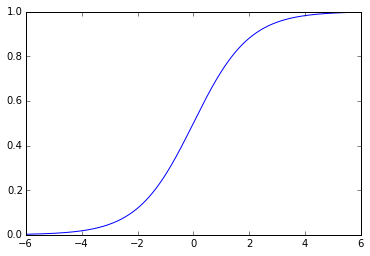

In [20]:
plt.plot(xval, yval, 'b')

<p>An equivalent function, we can compute the tanh logistic curve using theano</p><br/>
$$s2(x) = \frac{1 + tanh(\frac{x}{2})}{2}$$

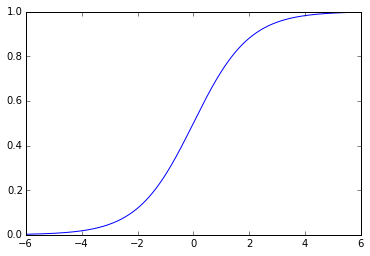

In [21]:
s2 = (1 + T.tanh(x/2))/2
logistic2 = theano.function([x], s2)
yval2 = logistic2(xval)
plt.plot(xval, yval2)

In [22]:
srng = RandomStreams(seed=234)
rv_u = srng.uniform((2000,))
rv_n = srng.normal((2000,))

In [23]:
f = theano.function([], rv_u)
g = theano.function([], rv_n, no_default_updates=True)    #Not updating rv_n.rng

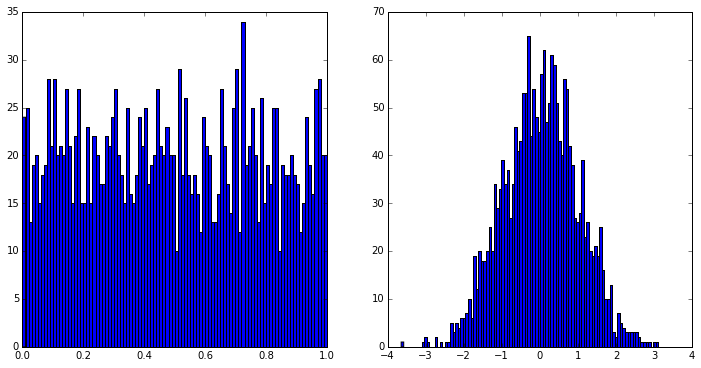

In [24]:
plt.figure(1, figsize=(12, 6))
plt.subplot(121)
plt.hist(f(), bins=100)

plt.subplot(122)
plt.hist(g(), bins=100)
plt.show()

<h3>Derivatives in Theano</h3>
<p>Computer the gradient of a function y with respect to x, example: $\frac{d}{dx}x^2 = 2\cdot x$</p>

In [25]:
x = T.dscalar('x')
y = x ** 2
gy = T.grad(y, x)
pp(gy)

'((fill((x ** TensorConstant{2}), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1})))'

In [26]:
f = theano.function([x], gy)

In [27]:
print f(4)
print f(80)

8.0
160.0


In [28]:
# compute the gradient of the sigmoid logistic function
xval = np.linspace(-6.0, 6.0, num=500)
x = T.dvector('x')
s = T.sum(1 / (1 + T.exp(-x)))
gs = T.grad(s, x)
dlogistic = theano.function([x], gs)
dyval = dlogistic(xval)

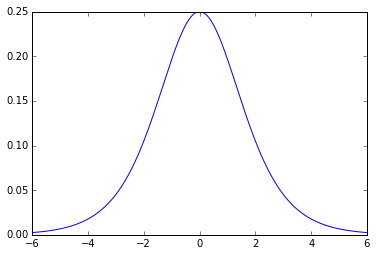

In [29]:
plt.plot(xval, dyval)

<h2>Linear Regression</h2>

In [30]:
X = T.scalar()
Y = T.scalar()

w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = X * w

In [31]:
cost = T.mean(T.sqr(y - Y))
gradient = T.grad(cost=cost, wrt=w)
updates = [[w, w - gradient * 0.01]]
X.dtype

'float64'

In [32]:
train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)

In [33]:
trX = np.linspace(-1, 1, num=101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

In [34]:
for i in range(100):
    for x, y in zip(trX, trY):
        train(x, y)
        
print w.get_value() #something around 2

1.89476065217


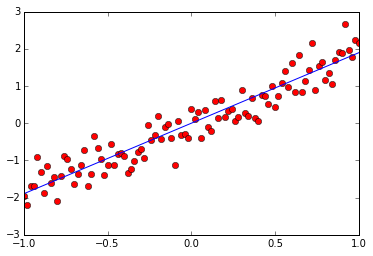

In [35]:
plt.plot(trX, trY, 'ro')
plt.plot(trX, trX * w.get_value())

<h2>Logistic Regression</h2>

In [38]:
N = 28
feats = 1
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))
data = pd.read_csv('log_reg_data.csv')


In [39]:
value = np.reshape(np.asarray(data['value']), (28, 1))
target = np.asarray(data['class'])

In [40]:
D = tuple((value, target))
#D = tuple((np.reshape(np.asarray(data['value']), (28, 1)), data['class']))
N = len(D)
training_steps = 100

In [41]:
# Declare Theano symbolic variables
x = T.matrix("x")
y = T.vector("y")
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(0., name="b")
print "Initial model:"
print w.get_value(), b.get_value()

Initial model:
[-1.96205727] 0.0


In [42]:
# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))   # Probability that target = 1
prediction = p_1 > 0.5                    # The prediction thresholded
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1) # Cross-entropy loss function
cost = xent.mean() + 0.001 * (w ** 2).sum()# The cost to minimize
gw, gb = T.grad(cost, [w, b])             # Compute the gradient of the cost
                                          # (we shall return to this in a
                                          # following section of this tutorial)

In [43]:
# Compile
train = theano.function(
          inputs=[x,y],
          outputs=[prediction, xent],
          updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)), allow_input_downcast=True)
predict = theano.function(inputs=[x], outputs=prediction, allow_input_downcast=True)

In [44]:
# Train
for i in range(training_steps):
    #pred, err = train(np.asarray(D['value']), np.asarray(D['class']))
    pred, err = train(np.asarray(D[0]), np.asarray(D[1]))

In [45]:
print "Final model:"
#print w.get_value(), b.get_value()
print "target values for D:", D[1]
print "prediction on D:", predict(D[0])

Final model:
target values for D: [0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1]
prediction on D: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
print "Percent error: ", float(sum(abs(D[1] - predict(D[0]))))/float(len(D[1]))

Percent error:  0.321428571429
